In [5]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import sklearn.datasets as datasets
import numpy as np

In [6]:
iris=datasets.load_iris()

In [7]:
x_train=iris.data[:,:2]
y_train=iris.target

In [12]:
estimator=[SVC(kernel="linear"),
           SVC(kernel="rbf"),
           SVC(kernel="poly"),
           LinearSVC()]
svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')#Radial Based Function 基于半径的函数
svc_poly = SVC(kernel='poly') # poly是多项式的意思
linear_svc = LinearSVC() # SVC(kernel = 'linear')相近方法更多，可以处理更多的数据

# 训练模型
svc_linear.fit(x_train,y_train)
svc_rbf.fit(x_train,y_train)
svc_poly.fit(x_train,y_train)
linear_svc.fit(x_train,y_train)

C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
# 网格密度
h = 0.02

# 设置x轴y轴的界限
x_min,x_max = x_train[:,0].min()-1, x_train[:,0].max()+1
y_min,y_max = x_train[:,1].min()-1, x_train[:,1].max()+1
# 得到网格的坐标
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                   np.arange(y_min,y_max,h))
xy_test=np.c_[xx.ravel(),yy.ravel()]

In [14]:
from matplotlib.colors import ListedColormap
titles=["linear","rbf","poly","LinearSVC"]

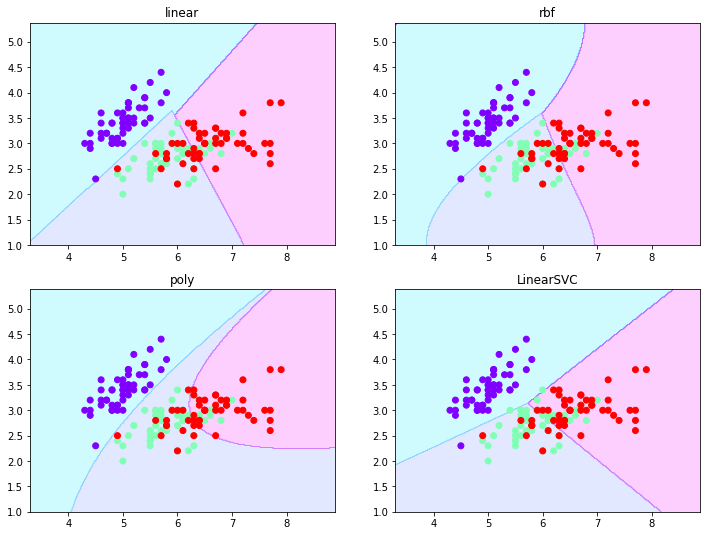

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,9))
for i,clf in enumerate((svc_linear,svc_rbf,svc_poly,linear_svc)):
    plt.subplot(2,2,i+1)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 等高线以及背景
    plt.contourf(xx,yy,Z,alpha=0.2,cmap = 'cool')

    # 实际点的图
    plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='rainbow')
    plt.title(titles[i])